# Veri Setinin Hikayesi 

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
titanic = sns.load_dataset("titanic")
df = titanic.copy()

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Veri Setinin Yapısal Bilgileri

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Eksik değerleri gözlemleme

In [9]:
df.isnull().values.any()

True

In [18]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
df.isnull().sum().sum()

869

In [7]:
df.notnull().sum()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [38]:
df[df.isnull().any(axis = 1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [15]:
!pip install missingno

In [16]:
import missingno as msno

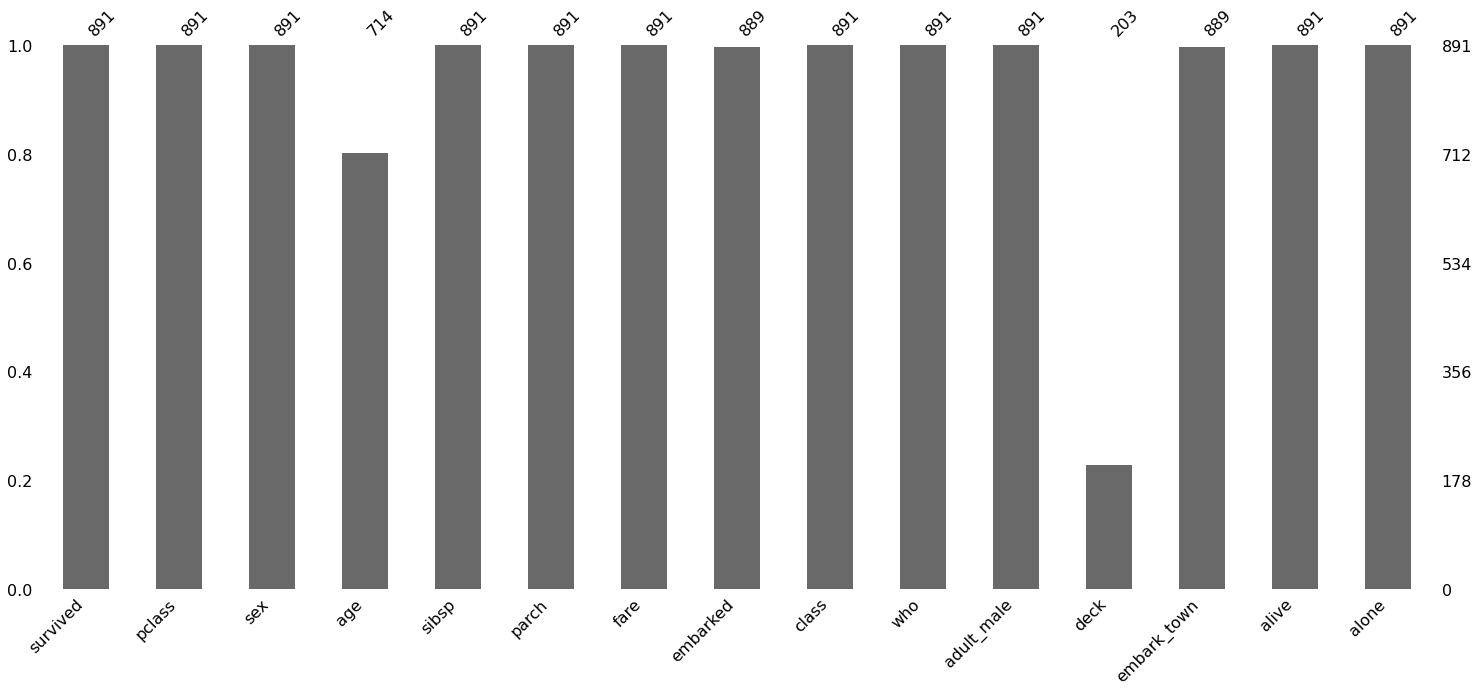

In [21]:
msno.bar(df);

<AxesSubplot:>

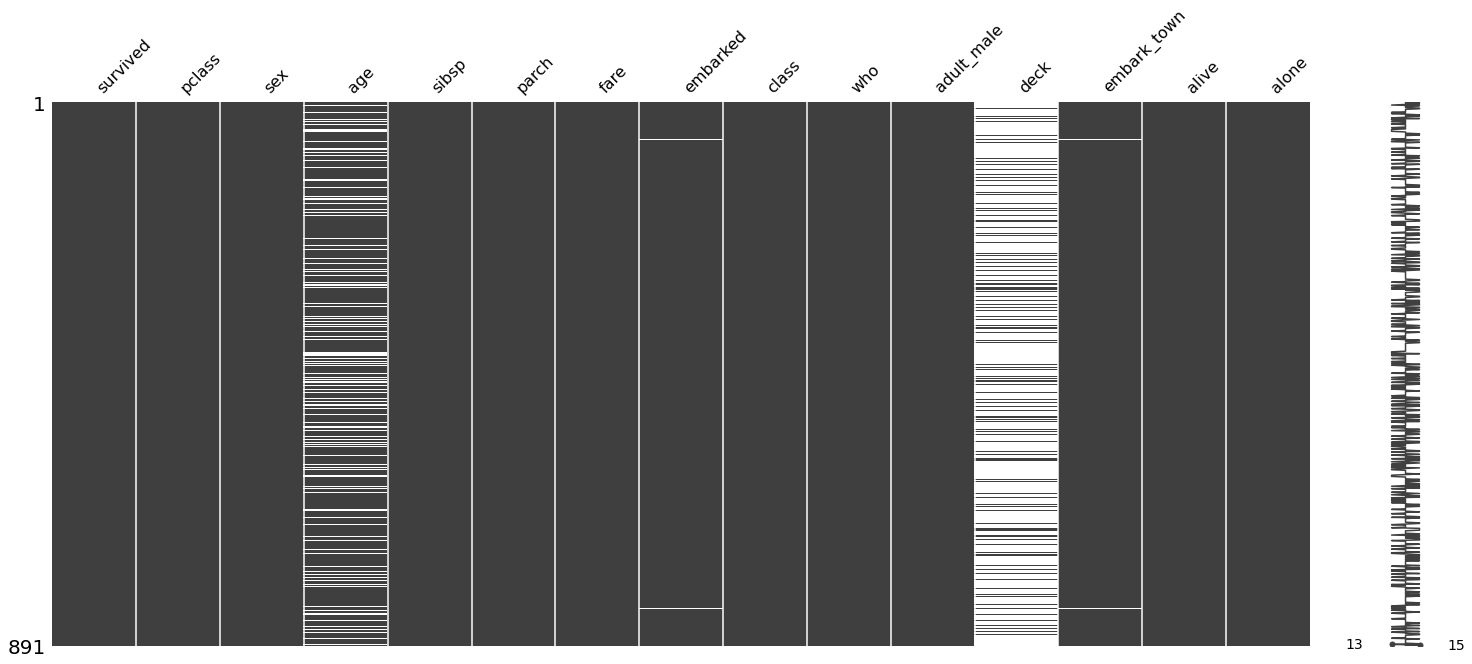

In [22]:
msno.matrix(df)

<AxesSubplot:>

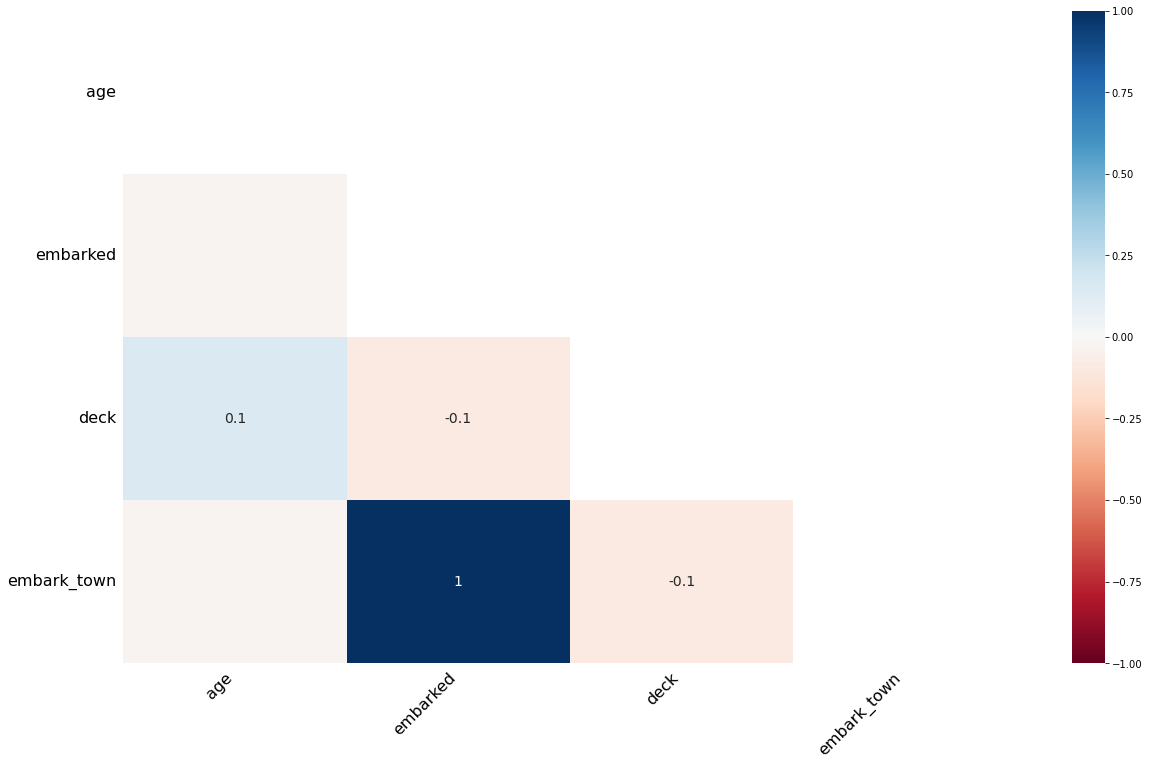

In [24]:
msno.heatmap(df)

# Değişken içerik bilgileri

In [7]:
df["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [34]:
df["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

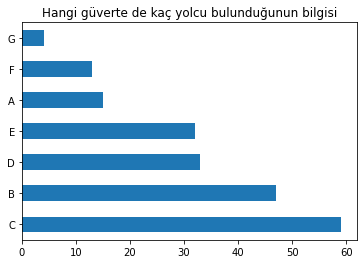

In [27]:
df["deck"].value_counts().plot.barh().set_title("Hangi güverte de kaç yolcu bulunduğunun bilgisi");

In [13]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [6]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [21]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [35]:
df["age"].max()

80.0

In [5]:
df['age'].min()

0.42

In [49]:
df["age"].mean()

29.69911764705882

In [53]:
df["fare"].mean()

32.2042079685746

In [9]:
df['fare'].std()

49.693428597180905

In [10]:
df['fare'].var()

2469.436845743117

# Veri Görselleştirme

In [57]:
df.groupby('sex')['survived'].sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [6]:
df.groupby('sex')['survived'].sum().sum()

342

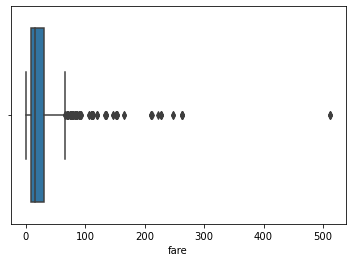

In [67]:
sns.boxplot(x = df["fare"]);

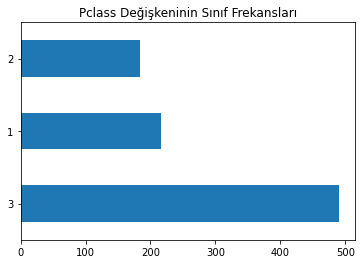

In [61]:
df["pclass"].value_counts().plot.barh().set_title("Pclass Değişkeninin Sınıf Frekansları");

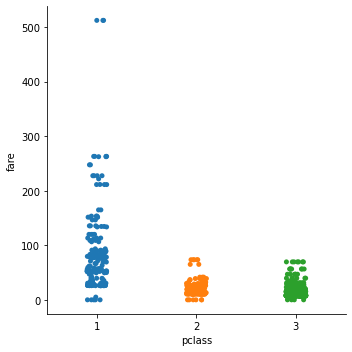

In [15]:
sns.catplot(x = "pclass", y = "fare", data = df);

<AxesSubplot:xlabel='pclass', ylabel='fare'>

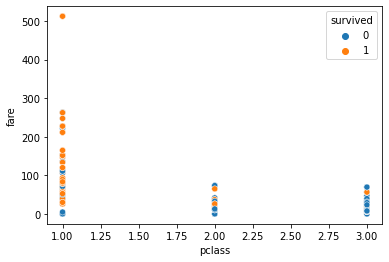

In [89]:
sns.scatterplot(x = "pclass", y = "fare", hue = "survived", data = df)

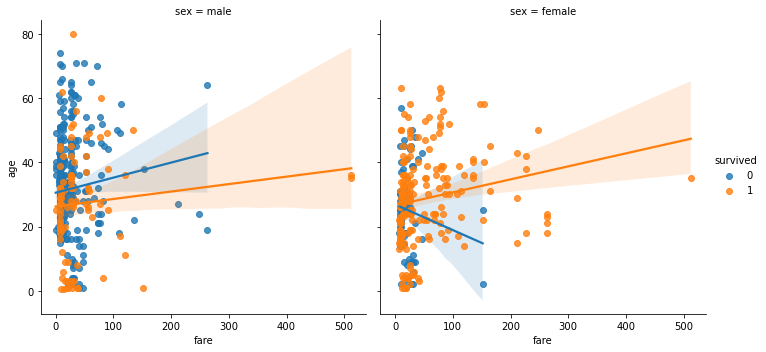

In [33]:
sns.lmplot(x = "fare", y = "age", col = "sex", hue = "survived", data = df);

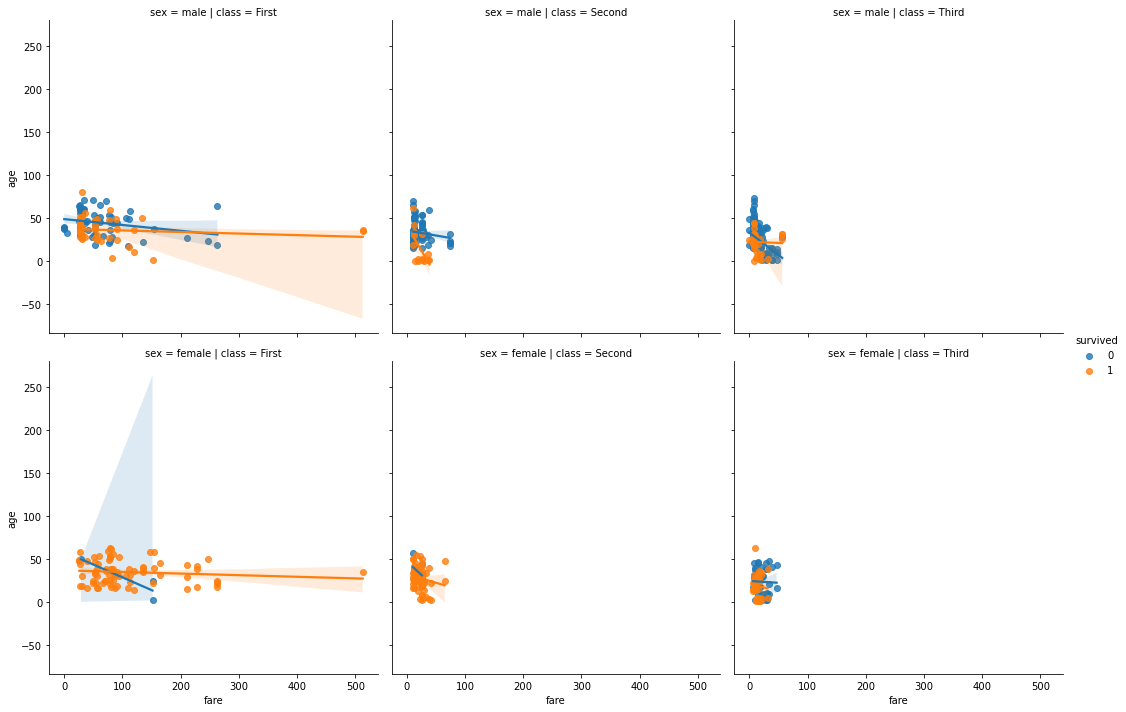

In [36]:
sns.lmplot(x = "fare", y = "age", hue = "survived", col = "class", row = "sex", data = df);